In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [55]:
d = pd.read_csv('/content/drive/My Drive/GeoPanda/pizza_11_2.csv',encoding = 'latin-1')
d

,index,store_name,city,state,zip,keys,latitude,longitude,menu_description,menu_name,has_meat,has_veg,price,state_population,state_land_area,state_population_density,state_median_income,min_distance
0,0,Shotgun Dans Pizza,Sherwood,AR,72120,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,NaN,Cheese Pizza,0,0,7.98,2978204,52068,57.2,43813,0.0478
1,1,Sauce Pizza Wine,Phoenix,AZ,85012,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,Pizza Cookie,0,0,6.00,6828065,113635,60.1,53510,0.0044
2,2,Mios Pizzeria,Cincinnati,OH,45209,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,0,0,6.49,11613423,40948,283.6,52407,0.0287
3,3,Hungry Howies Pizza,Madison Heights,MI,48071,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,Small Pizza,0,0,5.99,9922576,56804,174.7,52668,0.0246
4,4,Spartan Pizzeria,Baltimore,MD,21224,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,Pizza Sub,0,0,5.49,6006401,9774,614.5,78916,0.0049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,9919,Carbone's Pizzeria,Buffalo,NY,14206,us/ny/buffalo/1126elovejoyst/1921210585,42.889759,-78.806747,NaN,Super Steak Pizza,1,0,22.10,19795791,47214,419.3,62765,0.0109
9920,9920,Carbone's Pizzeria,Buffalo,NY,14206,us/ny/buffalo/1126elovejoyst/1921210585,42.889759,-78.806747,NaN,Large Cheese & 1 Item Pizza,0,0,10.10,19795791,47214,419.3,62765,0.0109
9921,9921,Giordano's Pizza,Saint Charles,IL,60174,us/il/saintcharles/3641emainst/1336179832,41.921300,-88.275300,NaN,"Individual 6"" Pepperoni Stuffed Deep Dish Pizza",1,0,8.45,12859995,55584,231.4,61229,0.0039
9922,9922,Giordano's Pizza,Saint Charles,IL,60174,us/il/saintcharles/3641emainst/1336179832,41.921300,-88.275300,NaN,"Individual 6"" Cheese Stuffed Deep Dish Pizza",0,0,8.45,12859995,55584,231.4,61229,0.0039


In [56]:
pip install geopandas

In [0]:
import geopandas as gpd
from shapely.geometry import Point,LineString,Polygon
import numpy as np
import matplotlib.pyplot as plt

In [0]:
list(d.columns)

In [0]:
d_geometry = [Point(xy) for xy in zip(d.longitude,d.latitude)]
d_geometry

In [68]:
d_geo = gpd.GeoDataFrame(d,geometry = d_geometry)
d_geo.head()
type(d_geo)

,index,store_name,city,state,zip,keys,latitude,longitude,menu_description,menu_name,has_meat,has_veg,price,state_population,state_land_area,state_population_density,state_median_income,min_distance,geometry
0,0,Shotgun Dans Pizza,Sherwood,AR,72120,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,NaN,Cheese Pizza,0,0,7.98,2978204,52068,57.2,43813,0.0478,POINT (-92.18380 34.83230)
1,1,Sauce Pizza Wine,Phoenix,AZ,85012,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,Pizza Cookie,0,0,6.00,6828065,113635,60.1,53510,0.0044,POINT (-112.07304 33.50927)
2,2,Mios Pizzeria,Cincinnati,OH,45209,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,0,0,6.49,11613423,40948,283.6,52407,0.0287,POINT (-84.43268 39.14488)
3,3,Hungry Howies Pizza,Madison Heights,MI,48071,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,Small Pizza,0,0,5.99,9922576,56804,174.7,52668,0.0246,POINT (-83.10663 42.51667)
4,4,Spartan Pizzeria,Baltimore,MD,21224,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,Pizza Sub,0,0,5.49,6006401,9774,614.5,78916,0.0049,POINT (-76.56698 39.28663)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,9919,Carbone's Pizzeria,Buffalo,NY,14206,us/ny/buffalo/1126elovejoyst/1921210585,42.889759,-78.806747,NaN,Super Steak Pizza,1,0,22.10,19795791,47214,419.3,62765,0.0109,POINT (-78.80675 42.88976)
9920,9920,Carbone's Pizzeria,Buffalo,NY,14206,us/ny/buffalo/1126elovejoyst/1921210585,42.889759,-78.806747,NaN,Large Cheese & 1 Item Pizza,0,0,10.10,19795791,47214,419.3,62765,0.0109,POINT (-78.80675 42.88976)
9921,9921,Giordano's Pizza,Saint Charles,IL,60174,us/il/saintcharles/3641emainst/1336179832,41.921300,-88.275300,NaN,"Individual 6"" Pepperoni Stuffed Deep Dish Pizza",1,0,8.45,12859995,55584,231.4,61229,0.0039,POINT (-88.27530 41.92130)
9922,9922,Giordano's Pizza,Saint Charles,IL,60174,us/il/saintcharles/3641emainst/1336179832,41.921300,-88.275300,NaN,"Individual 6"" Cheese Stuffed Deep Dish Pizza",0,0,8.45,12859995,55584,231.4,61229,0.0039,POINT (-88.27530 41.92130)


In [62]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [0]:
list(world.columns)

['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry']

In [0]:
%matplotlib inline

In [0]:
pip install descartes

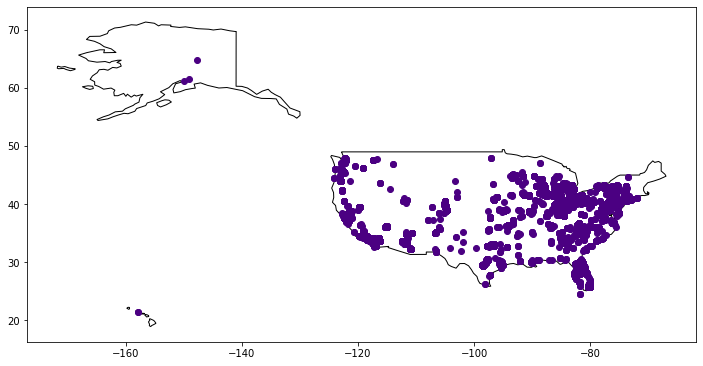

In [66]:
ax = world[world.iso_a3 == 'USA'].plot(figsize = (12,12),color = 'white', edgecolor = 'black')
d_geo.plot(ax = ax,color = 'indigo')

In [0]:
pip install folium

In [0]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [0]:
def embed_map(m,file_name):
  from IPython.display import IFrame
  m.save(file_name)
  return IFrame(file_name,width = '100%',height = '500px')

In [0]:
m_new = folium.Map(location = [40.3167,-76.0005],tiles = 'cartodbpositron',zoom_start = 10)
for idx,row in d_geo.iterrows():
  Marker([row['latitude'],row['longitude']]).add_to(m_new)

In [67]:
m_new

In [0]:
embed_map(m_new,'m_new.html')
from google.colab import files
files.download('m_new.html')

In [0]:
m_new_1 = folium.Map(location = [40.3167,-76.0005],tiles = 'cartodbpositron',zoom_start = 7)
m_new_1

In [0]:
embed_map(m_new_1,'m_new_1.html')
files.download('m_new_1.html')

In [0]:
m_4 = folium.Map(location = [40.3167,-76.0005],tiles = 'cartodbpositron',zoom_start=4)

In [0]:
def color_producer(val):
  if val <= 15:
    return 'forestgreen'
  elif val <= 25:
    return 'orange'
  else:
    return 'darkerd'

In [0]:
for i in range(0,len(d_geo)):
  Circle(
      location = [d_geo.iloc[i]['latitude'],d_geo.iloc[i]['longitude']],
      radius = 20,
      color = color_producer(d_geo.iloc[i]['price'])).add_to(m_4)

In [0]:
embed_map(m_4,'m_4.html')
files.download('m_4.html')